In [254]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

import warnings
warnings.filterwarnings("ignore")

from sklearn.linear_model import ElasticNet, LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, GradientBoostingRegressor
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.svm import SVC, SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score, classification_report, plot_confusion_matrix, plot_roc_curve


pd.options.mode.chained_assignment = None

# Data Analysis

In [162]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [163]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


<AxesSubplot:xlabel='stroke', ylabel='age'>

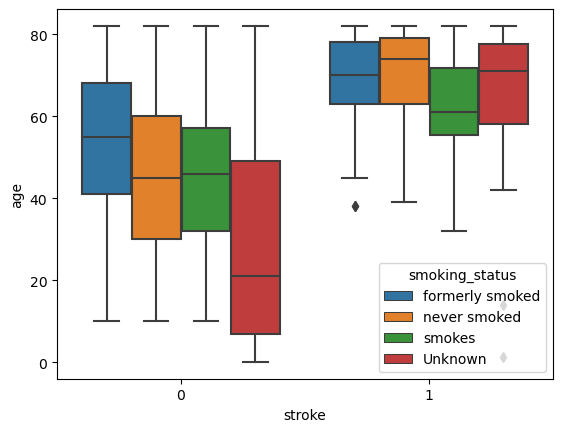

In [164]:
sns.boxplot(x = 'stroke', y = 'age',data = df, hue = 'smoking_status')

In [165]:
mean_1 = df[(df.age>=0) & (df.age<=20)]['bmi'].mean()
mean_2 = df[(df.age>20) & (df.age<=30)]['bmi'].mean()
mean_3 = df[(df.age>30) & (df.age<=45)]['bmi'].mean()
mean_4 = df[(df.age>45) & (df.age<=60)]['bmi'].mean()
mean_5 = df[(df.age>60) & (df.age<=90)]['bmi'].mean()

In [166]:
df['bmi'][(df.age>=0) & (df.age<=20)] = df['bmi'][(df.age>=0) & (df.age<=20)].fillna(mean_1)
df['bmi'][(df.age>20) & (df.age<=30)] = df['bmi'][(df.age>20) & (df.age<=30)].fillna(mean_2)
df['bmi'][(df.age>30) & (df.age<=45)] = df['bmi'][(df.age>30) & (df.age<=45)].fillna(mean_3)
df['bmi'][(df.age>45) & (df.age<=60)] = df['bmi'][(df.age>45) & (df.age<=60)].fillna(mean_4)
df['bmi'][(df.age>60) & (df.age<=90)] = df['bmi'][(df.age>60) & (df.age<=90)].fillna(mean_5)

<AxesSubplot:xlabel='stroke', ylabel='count'>

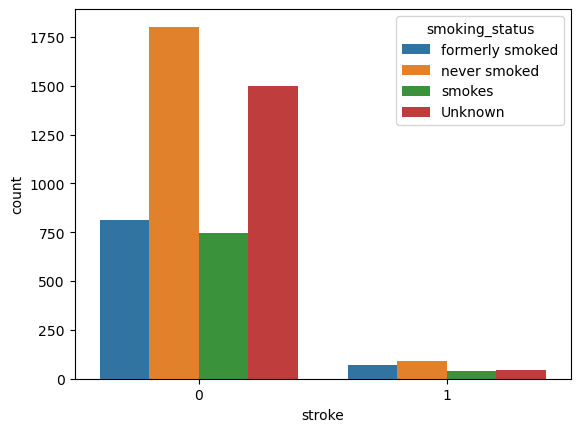

In [167]:
sns.countplot(x = 'stroke', hue = 'smoking_status', data = df)

In [168]:
df = df.drop('id', axis = 1)

In [169]:
df = df[df.gender != 'Other']

In [170]:
df.groupby('smoking_status').describe().transpose()

smoking_status               Unknown  formerly smoked  never smoked  \
age               count  1544.000000       884.000000   1892.000000   
                  mean     30.229922        54.962670     46.744715   
                  std      25.055556        17.624810     19.769584   
                  min       0.080000        10.000000     10.000000   
                  25%       8.000000        43.000000     31.000000   
                  50%      23.000000        57.000000     47.000000   
                  75%      51.000000        69.000000     62.000000   
                  max      82.000000        82.000000     82.000000   
hypertension      count  1544.000000       884.000000   1892.000000   
                  mean      0.033679         0.135747      0.122622   
                  std       0.180459         0.342713      0.328089   
                  min       0.000000         0.000000      0.000000   
                  25%       0.000000         0.000000      0.000000   
                  50%       0.000000         0.000000      0.000000   
                  75%       0.000000         0.000000      0.000000   
                  max       1.000000         1.000000      1.000000   
heart_disease     count  1544.000000       884.000000   1892.000000   
                  mean      0.031088         0.087104      0.047569   
                  std       0.173612         0.282147      0.212908   
                  min       0.000000         0.000000      0.000000   
                  25%       0.000000         0.000000      0.000000   
                  50%       0.000000         0.000000      0.000000   
                  75%       0.000000         0.000000      0.000000   
                  max       1.000000         1.000000      1.000000   
avg_glucose_level count  1544.000000       884.000000   1892.000000   
                  mean     99.601541       112.851640    107.558092   
                  std      36.606195        52.276159     46.679640   
                  min      55.230000        55.270000     55.120000   
                  25%      76.785000        78.022500     77.105000   
                  50%      90.420000        92.430000     92.215000   
                  75%     110.155000       120.257500    116.162500   
                  max     260.850000       267.760000    267.600000   
bmi               count  1544.000000       884.000000   1892.000000   
                  mean     25.767757        30.732266     29.978166   
                  std       8.033762         6.802573      7.391541   
                  min      10.300000        15.000000     11.500000   
                  25%      19.500000        26.100000     24.900000   
                  50%      24.600000        29.873377     28.750000   
                  75%      30.200000        34.300000     33.500000   
                  max      97.600000        56.100000     92.000000   
stroke            count  1544.000000       884.000000   1892.000000   
                  mean      0.030440         0.079186      0.047569   
                  std       0.171851         0.270181      0.212908   
                  min       0.000000         0.000000      0.000000   
                  25%       0.000000         0.000000      0.000000   
                  50%       0.000000         0.000000      0.000000   
                  75%       0.000000         0.000000      0.000000   
                  max       1.000000         1.000000      1.000000   

smoking_status               smokes  
age               count  789.000000  
                  mean    47.096324  
                  std     16.413002  
                  min     10.000000  
                  25%     33.000000  
                  50%     47.000000  
                  75%     59.000000  
                  max     82.000000  
hypertension      count  789.000000  
                  mean     0.119138  
                  std      0.324156  
                  min      0.000000  
                  25%     

In [171]:
df['smoking_status'] = df['smoking_status'].replace('Unknown', 'never smoked')

In [172]:
def convert(x):
    if (x<1):
        return 0
    else:
        return x
df['age'] = df['age'].apply(convert)

In [173]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,29.873377,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,29.873377,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


In [174]:
df = pd.get_dummies(df, drop_first = True)

<AxesSubplot:xlabel='age', ylabel='bmi'>

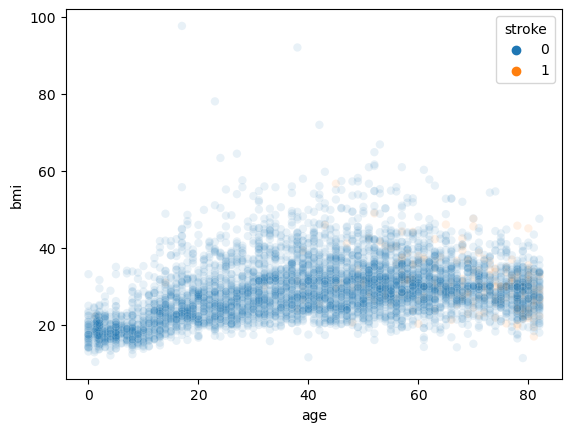

In [175]:
sns.scatterplot(data = df, x = 'age', y = 'bmi', hue = 'stroke', alpha = 0.1)

<AxesSubplot:xlabel='age', ylabel='avg_glucose_level'>

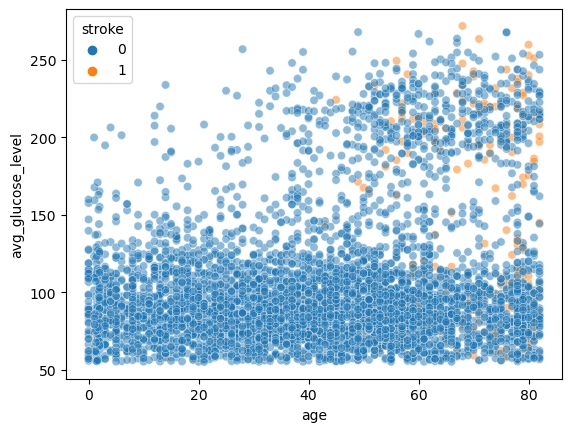

In [176]:
sns.scatterplot(data = df, x = 'age', y = 'avg_glucose_level', hue = 'stroke', alpha = 0.5)

In [177]:
df.corr().stroke.sort_values()

work_type_children            -0.083888
smoking_status_never smoked   -0.059007
work_type_Never_worked        -0.014885
smoking_status_smokes          0.008920
gender_Male                    0.009081
work_type_Private              0.011927
Residence_type_Urban           0.015415
bmi                            0.043449
work_type_Self-employed        0.062150
ever_married_Yes               0.108299
hypertension                   0.127891
avg_glucose_level              0.131991
heart_disease                  0.134905
age                            0.245193
stroke                         1.000000
Name: stroke, dtype: float64

In [178]:
X = df.drop('stroke', axis = 1)
y = df['stroke']

# Support Vector Machine (with SMOTE)

In [179]:
sm = SMOTE(random_state = 101)
X,y = sm.fit_resample(X,y)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

svm = SVC()

param_grid = {'C':[0.01, 0.1, 0.5, 1, 10],
             'kernel':['linear', 'rbf'],
             'gamma':['auto', 'scale']}

grid_model = GridSearchCV(svm, param_grid)

grid_model.fit(x_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 0.5, 1, 10],
                         'gamma': ['auto', 'scale'],
                         'kernel': ['linear', 'rbf']})

In [180]:
y_pred = grid_model.predict(x_test)
accuracy_score(y_test, y_pred)

0.892318244170096

In [181]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.87      0.89      1478
           1       0.87      0.92      0.89      1438

    accuracy                           0.89      2916
   macro avg       0.89      0.89      0.89      2916
weighted avg       0.89      0.89      0.89      2916



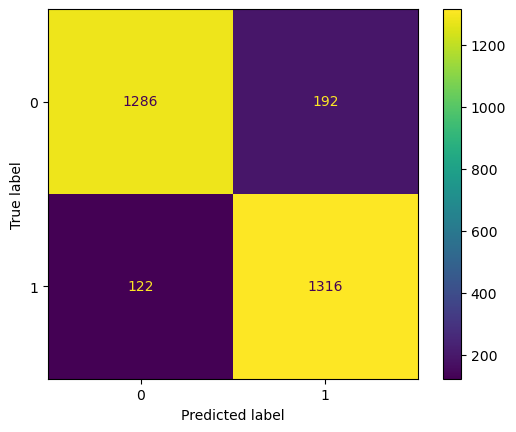

In [182]:
plot_confusion_matrix(grid_model, x_test, y_test)

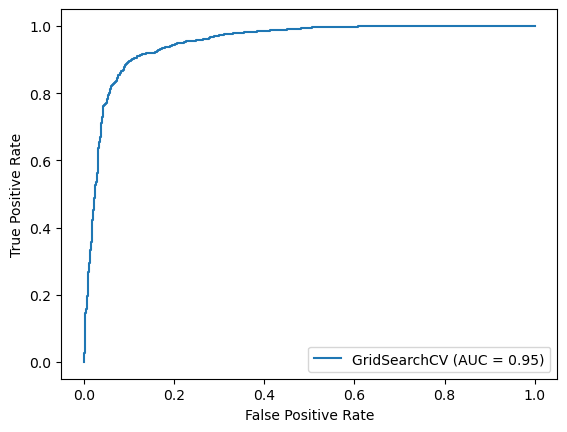

In [183]:
plot_roc_curve(grid_model, x_test, y_test)

# Logistic Regression (with SMOTE)

In [186]:
log_model = LogisticRegression(solver = 'saga')
sm = SMOTE(random_state = 101)
X,y = sm.fit_resample(X,y)

x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 101)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

param_grid = {'C':[0.01, 0.1, 0.5, 1, 10],
             'penalty':['l1', 'l2', 'elasticnet'],
              'l1_ratio':[0, 0.1, 0.5, 0.9, 1]}

grid_model = GridSearchCV(log_model, param_grid)

grid_model.fit(x_train, y_train)

GridSearchCV(estimator=LogisticRegression(solver='saga'),
             param_grid={'C': [0.01, 0.1, 0.5, 1, 10],
                         'l1_ratio': [0, 0.1, 0.5, 0.9, 1],
                         'penalty': ['l1', 'l2', 'elasticnet']})

In [187]:
grid_model.best_params_

{'C': 0.01, 'l1_ratio': 0, 'penalty': 'l2'}

In [188]:
y_pred = grid_model.predict(x_test)

In [189]:
accuracy_score(y_test, y_pred)

0.8463648834019204

In [190]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85      1478
           1       0.84      0.85      0.85      1438

    accuracy                           0.85      2916
   macro avg       0.85      0.85      0.85      2916
weighted avg       0.85      0.85      0.85      2916



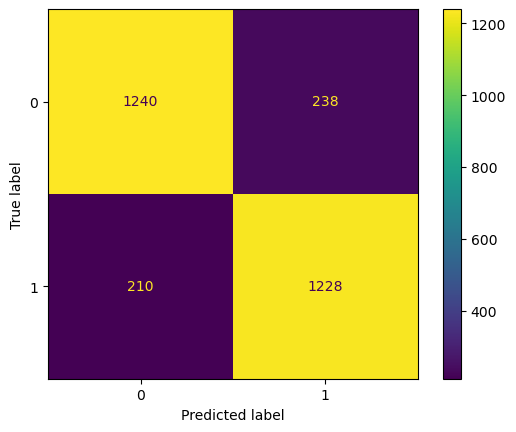

In [191]:
plot_confusion_matrix(grid_model, x_test, y_test)

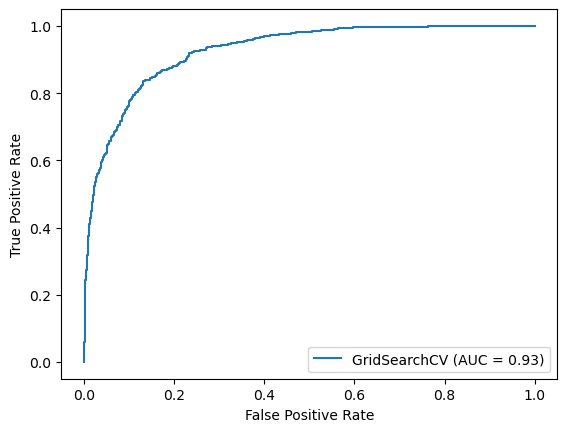

In [192]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(grid_model, x_test, y_test)

# KNeighborsClassifier (with GridSearch)

In [193]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state = 101)
X,y = sm.fit_resample(X,y)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

scaler = StandardScaler()
knn = KNeighborsClassifier()

operations = [('scaler', scaler), ('knn', knn)]
pipe_model = Pipeline(operations)
knn_values = list(range(1,20))
grid_model = GridSearchCV(pipe_model, {'knn__n_neighbors':knn_values}, scoring = 'precision', cv=5)

grid_model.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19]},
             scoring='precision')

Text(0, 0.5, 'Accuracy')

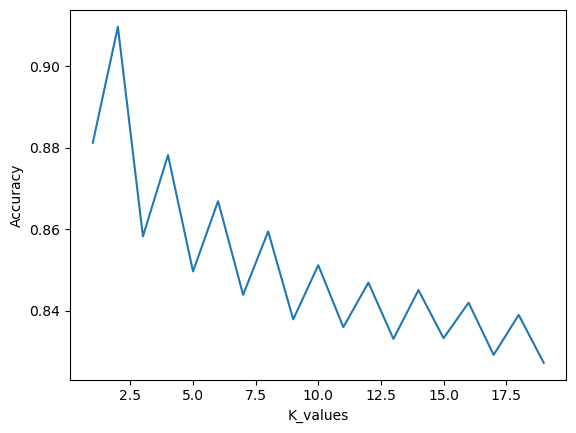

In [195]:
plt.plot(list(range(1,20)), grid_model.cv_results_['mean_test_score'])
plt.xlabel('K_values')
plt.ylabel('Accuracy')

In [196]:
from sklearn.metrics import accuracy_score, classification_report, plot_confusion_matrix
y_pred = grid_model.predict(x_test)
accuracy_score(y_test, y_pred)

0.9221536351165981

In [197]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92      1478
           1       0.92      0.92      0.92      1438

    accuracy                           0.92      2916
   macro avg       0.92      0.92      0.92      2916
weighted avg       0.92      0.92      0.92      2916



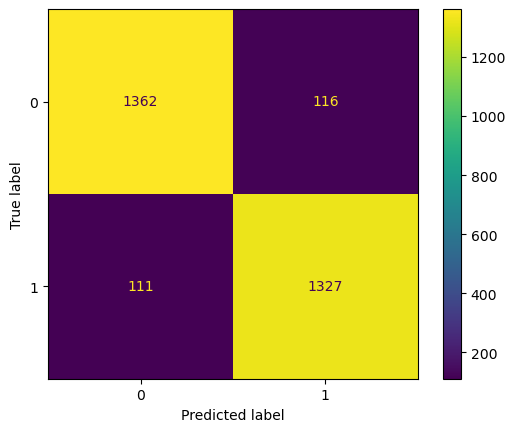

In [198]:
plot_confusion_matrix(grid_model, x_test, y_test)

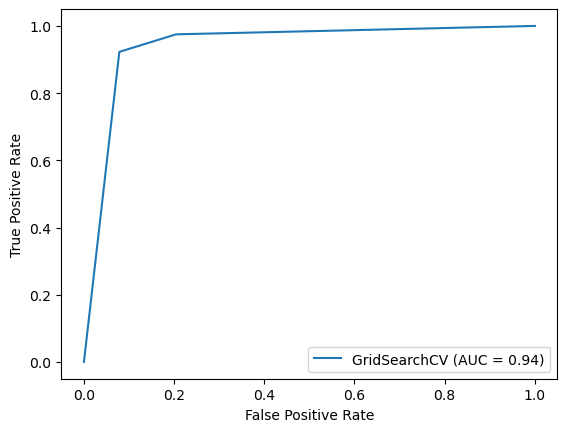

In [199]:
plot_roc_curve(grid_model, x_test, y_test)

# GradientBoostingClassifier

In [200]:
sm = SMOTE(random_state = 101)

X, y = sm.fit_resample(X, y)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

gbc = GradientBoostingClassifier()
param_grid = {'n_estimators':[50, 100, 150, 200, 250],
             'max_depth':[1,2,3,4,5,6],
             'learning_rate':[0.1, 0.5, 0.9, 1, 10]}

grid_model = GridSearchCV(gbc, param_grid)
grid_model.fit(x_train, y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.5, 0.9, 1, 10],
                         'max_depth': [1, 2, 3, 4, 5, 6],
                         'n_estimators': [50, 100, 150, 200, 250]})

In [201]:
grid_model.best_params_

{'learning_rate': 0.5, 'max_depth': 6, 'n_estimators': 250}

In [202]:
preds = grid_model.predict(x_test)
accuracy_score(y_test, preds)

0.9639917695473251

In [203]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96      1478
           1       0.96      0.96      0.96      1438

    accuracy                           0.96      2916
   macro avg       0.96      0.96      0.96      2916
weighted avg       0.96      0.96      0.96      2916



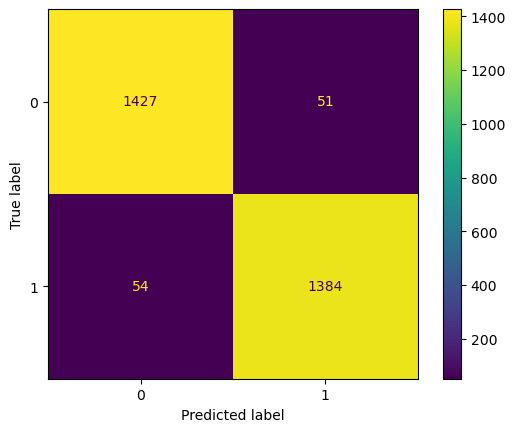

In [204]:
plot_confusion_matrix(grid_model, x_test, y_test)

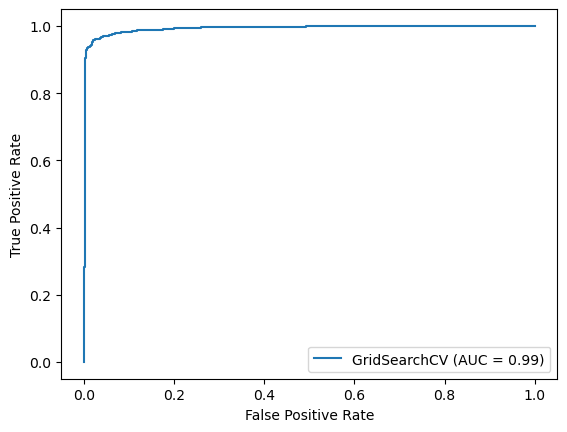

In [205]:
plot_roc_curve(grid_model, x_test, y_test)

# RandomForestClassifier (with SMOTE)

In [206]:
rfc = RandomForestClassifier()

sm = SMOTE(random_state = 101)
X, y = sm.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 101)

param_grid = {'max_depth':[1,2,3,4,5,6,None],
             'n_estimators':[50, 60, 100, 150, 200, 250],
             'max_features':['sqrt', 'log2', None],
             'bootstrap':[True, False],
             'max_leaf_nodes': [2, 3, 4, 5, None]}

grid = GridSearchCV(rfc, param_grid)
grid.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'max_depth': [1, 2, 3, 4, 5, 6, None],
                         'max_features': ['sqrt', 'log2', None],
                         'max_leaf_nodes': [2, 3, 4, 5, None],
                         'n_estimators': [50, 60, 100, 150, 200, 250]})

In [207]:
grid.best_params_

{'bootstrap': False,
 'max_depth': None,
 'max_features': 'log2',
 'max_leaf_nodes': None,
 'n_estimators': 200}

In [208]:
preds = grid.predict(X_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95      1478
           1       0.94      0.96      0.95      1438

    accuracy                           0.95      2916
   macro avg       0.95      0.95      0.95      2916
weighted avg       0.95      0.95      0.95      2916



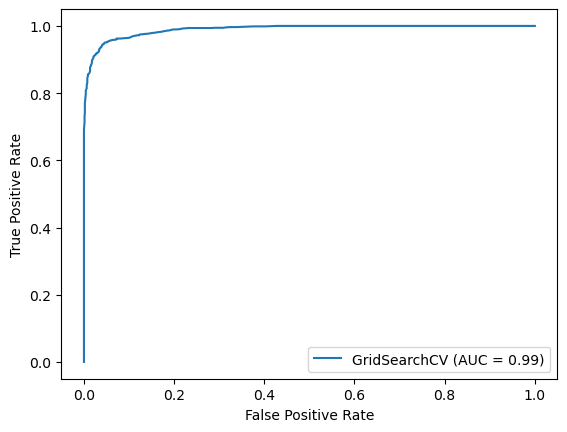

In [209]:
plot_roc_curve(grid, x_test, y_test)

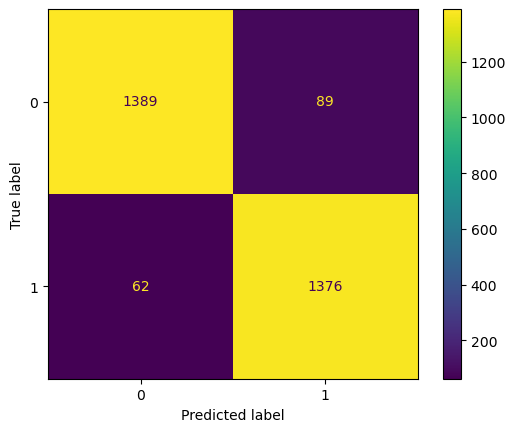

In [210]:
plot_confusion_matrix(grid, x_test, y_test)

# DecisionTreeClassifier

In [217]:
tree = DecisionTreeClassifier()

sm = SMOTE(random_state = 101)
X,y = sm.fit_resample(X,y)

x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 101)

param_grid = {'max_depth':[1,2,3,4,5,None],
             'max_leaf_nodes':[2,3,4,5,6,None]}

grid_model = GridSearchCV(tree, param_grid)

grid_model.fit(x_train, y_train)

preds = grid_model.predict(x_test)

In [218]:
accuracy_score(y_test, preds)

0.9132373113854595

In [219]:
grid_model.best_estimator_.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best'}

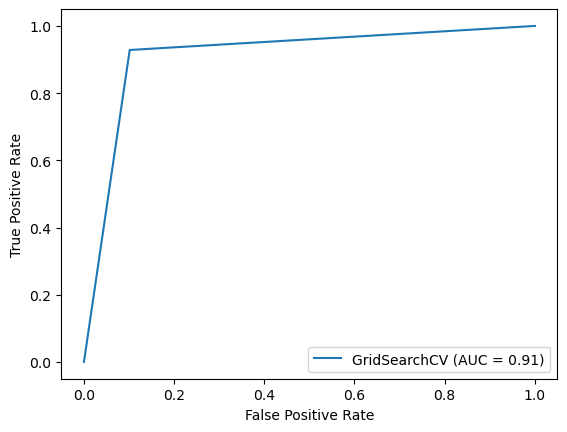

In [220]:
plot_roc_curve(grid_model, x_test, y_test)

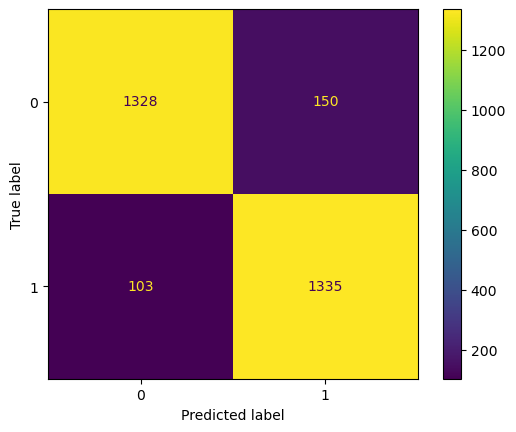

In [221]:
plot_confusion_matrix(grid_model, x_test, y_test)

In [222]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.93      0.90      0.91      1478
           1       0.90      0.93      0.91      1438

    accuracy                           0.91      2916
   macro avg       0.91      0.91      0.91      2916
weighted avg       0.91      0.91      0.91      2916



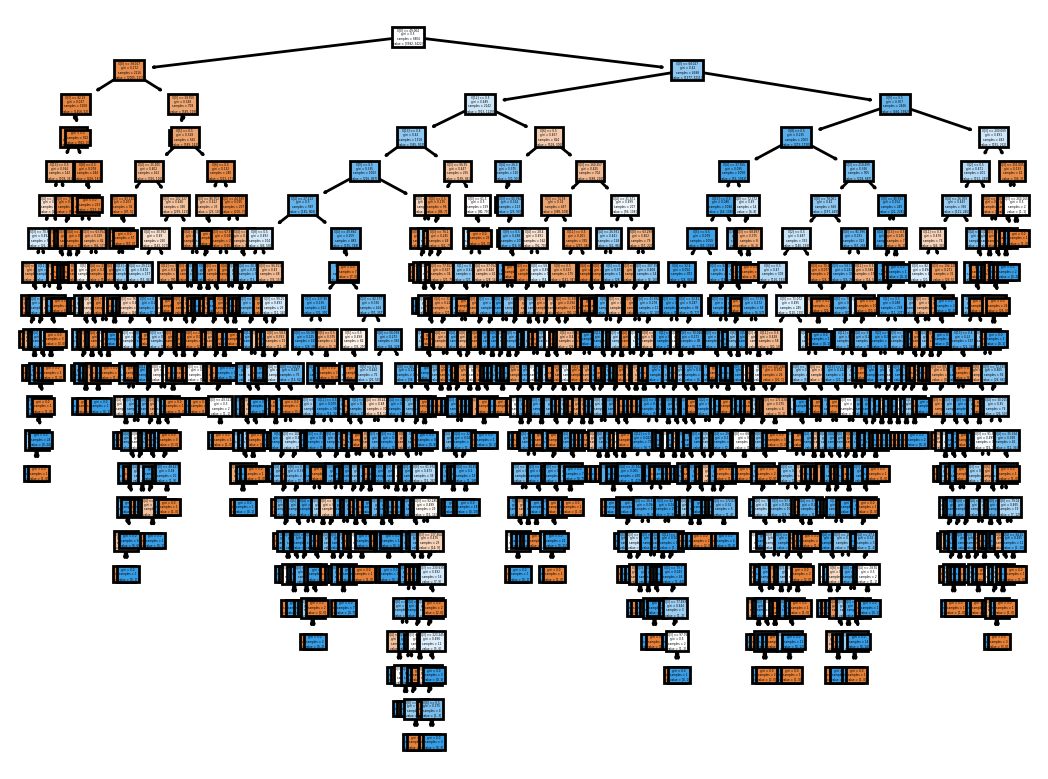

In [223]:
from sklearn.tree import plot_tree
plt.figure(dpi = 200)
plot_tree(grid_model.best_estimator_, filled = True);

In [224]:
df.corr().bmi.sort_values()

work_type_children            -0.450878
smoking_status_never smoked   -0.154643
work_type_Never_worked        -0.028740
gender_Male                   -0.023876
Residence_type_Urban          -0.000316
heart_disease                  0.042758
stroke                         0.043449
work_type_Self-employed        0.073689
smoking_status_smokes          0.088373
hypertension                   0.165201
avg_glucose_level              0.172994
work_type_Private              0.206434
age                            0.334951
ever_married_Yes               0.343402
bmi                            1.000000
Name: bmi, dtype: float64

# BMI prediction with GradientBoostingRegressor

In [225]:
X = df.drop('bmi', axis = 1)
y = df['bmi']

In [255]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 101)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

grad = GradientBoostingRegressor()

param_grid = {'n_estimators':[50, 100, 150, 200, 250],
             'max_depth':[2,3,4,5,6],
             'max_features':['sqrt', 'log2', None],
             'learning_rate':[0.1, 0.2, 0.5, 0.9, 1, 10]}

grid_model = GridSearchCV(grad, param_grid)
grid_model.fit(x_train, y_train)

GridSearchCV(estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.1, 0.2, 0.5, 0.9, 1, 10],
                         'max_depth': [2, 3, 4, 5, 6],
                         'max_features': ['sqrt', 'log2', None],
                         'n_estimators': [50, 100, 150, 200, 250]})

In [256]:
grid_model.best_params_

{'learning_rate': 0.1,
 'max_depth': 2,
 'max_features': None,
 'n_estimators': 50}

In [257]:
y_pred = grid_model.predict(x_test)
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
MAE = mean_absolute_error(y_test, y_pred)

In [258]:
RMSE

6.579673800467406

In [259]:
MAE

4.761001121660097

In [260]:
df.bmi.mean()

28.919203702192902

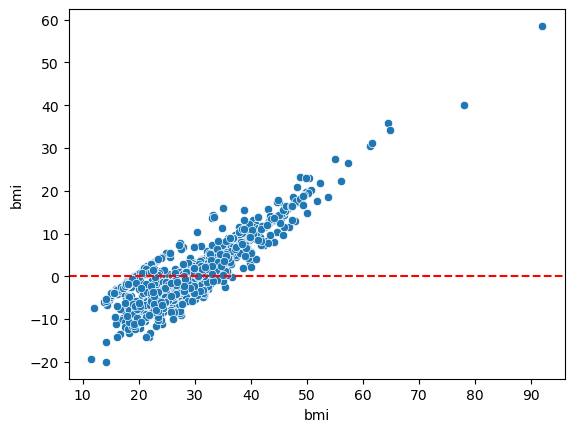

In [261]:
sns.scatterplot(x=y_test,y=y_test - y_pred)
plt.axhline(y=0, color='r', linestyle='--')

<AxesSubplot:xlabel='age', ylabel='bmi'>

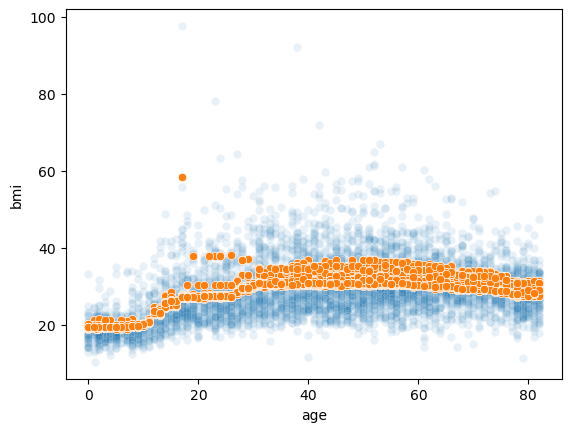

In [262]:
new_scaler = StandardScaler()
y_hat = grid_model.predict(new_scaler.fit_transform(X))
sns.scatterplot(x = 'age', y = 'bmi', data = df, alpha = 0.1)
sns.scatterplot(x = df.age, y = y_hat)

<AxesSubplot:xlabel='avg_glucose_level', ylabel='bmi'>

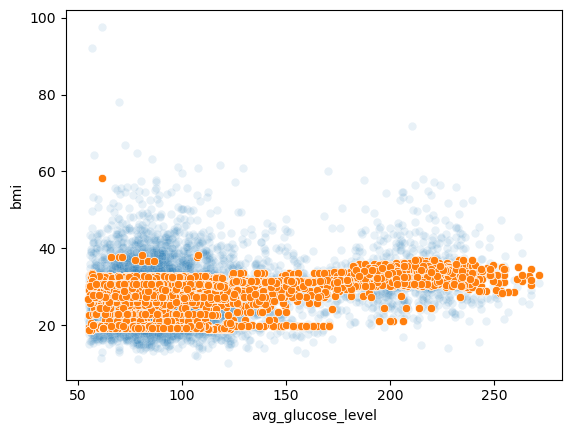

In [263]:
y_hat = grid_model.predict(new_scaler.transform(X))
sns.scatterplot(x = 'avg_glucose_level', y = 'bmi', data = df, alpha = 0.1)
sns.scatterplot(x = df.avg_glucose_level, y = y_hat)

# BMI prediction SVR

In [235]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 101)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

svr = SVR()

param_grid = {'kernel':['linear', 'poly', 'rbf'],
             'gamma':['scale', 'auto'],
             'C':[0.01, 0.1, 1, 10, 100],
             'degree':[2, 3, 4],
             'epsilon':[0,0.01,0.1,0.5,1,2]}

grid_model = GridSearchCV(svr, param_grid)

grid_model.fit(x_train, y_train)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'degree': [2, 3, 4],
                         'epsilon': [0, 0.01, 0.1, 0.5, 1, 2],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf']})

In [236]:
grid_model.best_params_

{'C': 10, 'degree': 2, 'epsilon': 2, 'gamma': 'auto', 'kernel': 'poly'}

In [237]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
y_pred = grid_model.predict(x_test)
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
MAE = mean_absolute_error(y_test, y_pred)

In [238]:
RMSE

6.698475842846252

In [239]:
MAE

4.724343482239798

<AxesSubplot:xlabel='age', ylabel='bmi'>

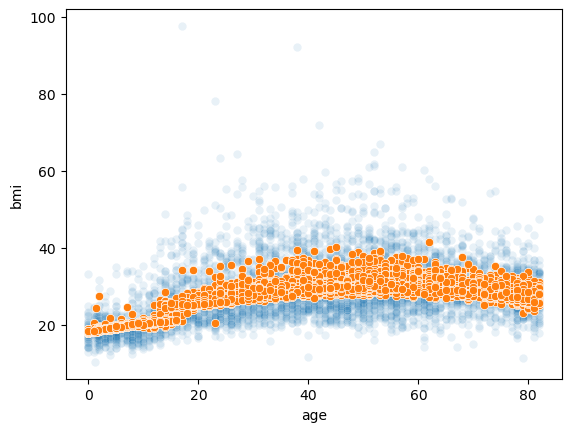

In [240]:
x_new = scaler.transform(X)
y_hat = grid_model.predict(x_new)
sns.scatterplot(x = 'age', y = 'bmi', data = df, alpha = 0.1)
sns.scatterplot(x = df.age, y = y_hat)

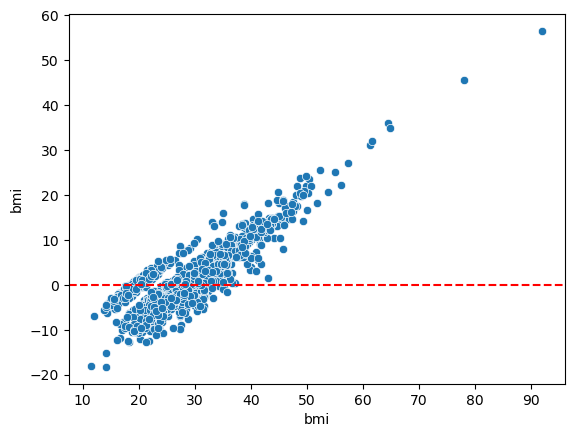

In [241]:
sns.scatterplot(x=y_test,y=y_test - y_pred)
plt.axhline(y=0, color='r', linestyle='--')

<AxesSubplot:xlabel='avg_glucose_level', ylabel='bmi'>

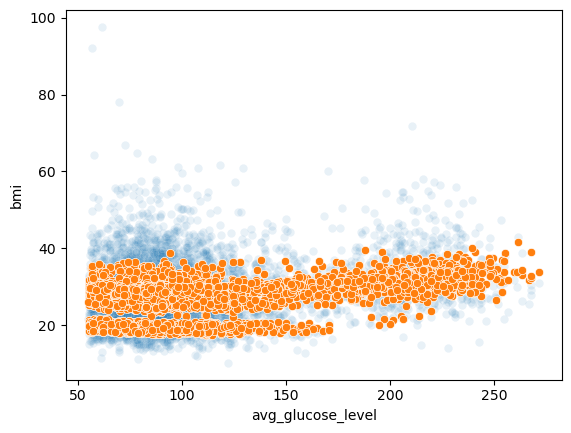

In [242]:
y_hat = grid_model.predict(new_scaler.transform(X))
sns.scatterplot(x = 'avg_glucose_level', y = 'bmi', data = df, alpha = 0.1)
sns.scatterplot(x = df.avg_glucose_level, y = y_hat)

# Random Forest Regressor


In [243]:
from sklearn.ensemble import RandomForestRegressor

rfc = RandomForestRegressor()

x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 101)

param_grid = {'max_depth':[1, 2, 3, 4, 5, 6],
             'n_estimators':[50, 100, 150, 200, 250],
             'max_features':['sqrt', 'log2'],
             'bootstrap':[True, False]}

grid = GridSearchCV(rfc, param_grid)

grid.fit(x_train, y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True, False],
                         'max_depth': [1, 2, 3, 4, 5, 6],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [50, 100, 150, 200, 250]})

In [244]:
grid.best_params_

{'bootstrap': True,
 'max_depth': 6,
 'max_features': 'log2',
 'n_estimators': 200}

In [245]:
preds = grid.predict(x_test)
RMSE = np.sqrt(mean_squared_error(y_test, preds))
MAE = mean_absolute_error(y_test, preds)

In [246]:
RMSE

6.635856268165772

In [247]:
MAE

4.793544097650067

<AxesSubplot:xlabel='age', ylabel='bmi'>

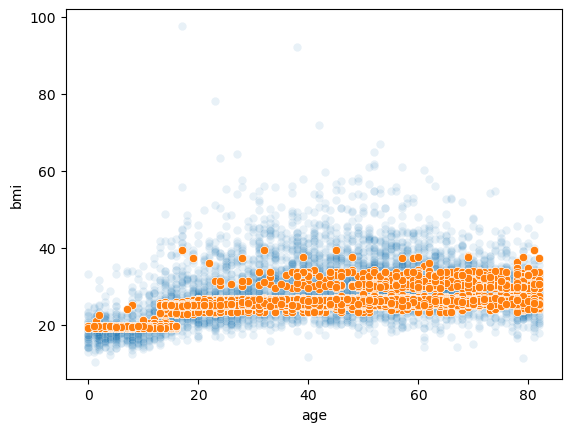

In [248]:
x_new = scaler.transform(X)
y_hat = grid.predict(x_new)
sns.scatterplot(x = 'age', y = 'bmi', data = df, alpha = 0.1)
sns.scatterplot(x = df.age, y = y_hat)

<AxesSubplot:xlabel='avg_glucose_level', ylabel='bmi'>

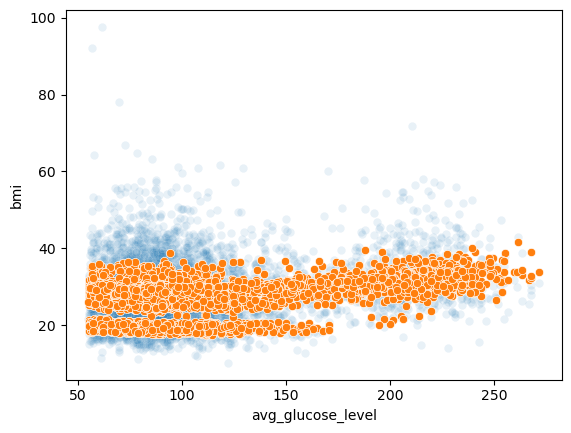

In [249]:
y_hat = grid_model.predict(new_scaler.transform(X))
sns.scatterplot(x = 'avg_glucose_level', y = 'bmi', data = df, alpha = 0.1)
sns.scatterplot(x = df.avg_glucose_level, y = y_hat)

# The Dataset for this project is obtained from Kaggle website